<a href="https://colab.research.google.com/github/WanjaWhoopie/Credit-Scoring/blob/main/Test_Pre_credit_explore_and_optbinning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install optbinning

from optbinning import OptimalBinning

In [ ]:
# !pip install featuretools
# import featuretools as ft


In [ ]:
pip install pandas --upgrade

# **Load Data and Split**

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset =  pd.read_csv("/content/drive/My Drive/AICE/scData.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,35,37,44,46,47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset.shape

(5447, 151)

In [ ]:
precred_cols =['government_institution_income', 'private_institution_income', 'remittance_income', 'agricutural_income',
               'commericial_trade_income', 'service_provision_income', 'commericial_trade_income', 'frequent_monthly_expense',
               'number of loans', 'number of outstanding loans', 'remaining_payment_months', 'sum_otherincome']

In [ ]:
# changing the labeling of the target variable
dataset['good_bad'] = np.where(dataset['Bad90'].isin([1]), 0, 1)

In [ ]:
# add the values of other income columns
other_income_cols = ['pension_income',
       'government_institution_income', 'private_institution_income',
       'remittance_income', 'commericial_trade_income',
       'service_provision_income']

dataset['income_sum'] = dataset[other_income_cols].sum(axis=1)
dataset['income_sum'].head()

0       0
1       0
2       0
3       0
4    7000
Name: income_sum, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
data_inputs_train, data_inputs_test, data_targets_train, data_targets_test = train_test_split(dataset.drop('Bad90', axis = 1), dataset['Bad90'], test_size = 0.2, random_state = 42)

In [ ]:
df_inputs_test = data_inputs_test
df_targets_test = data_targets_test

# **1. Government_institution_income**

In [ ]:
dataset['government_institution_income'].unique()

array([     0,  41000,  25000,  30000,  55000,  38000,  20000,  42000,
        33000, 100000,  18000,  60000,  44000,  54000,  47000,  15000,
        50000,  40000,   8000,  80000,  10000,  90000, 123000,  24000,
       500000,  21000, 250000,  23000, 200000,  32000,  75000,  89000,
        12000,  35000,  70000,  22000,  45000,  52000, 120000, 125000])

In [ ]:
dataset['government_institution_income'].describe()

count      5447.000000
mean        886.543051
std       10725.602036
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      500000.000000
Name: government_institution_income, dtype: float64

5362 are zeros

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


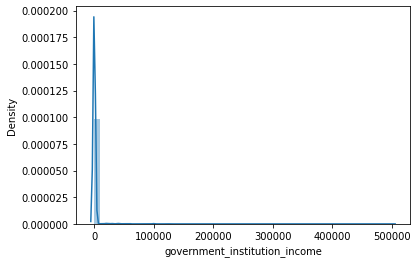

In [ ]:
#visualise ditribution
sns.distplot(dataset['government_institution_income'])

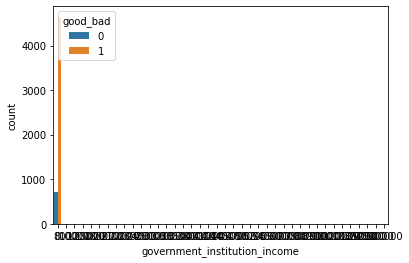

In [ ]:
sns.countplot(x= 'government_institution_income', data=dataset, hue= 'good_bad')

# **2. Private_institution_income**

In [ ]:
dataset['private_institution_income'].unique()

array([     0,  31000,  35000, 150000,  30000,  25000,   7000,  20000,
        70000,  15000,  12000,  18000,  60000,  90000, 120000,  80000,
        10000,   4500,   6000,  72200, 110000,  12800,  45000,   7500,
        50000,  55000, 140000,  65000, 570000,      1, 100000,  24000,
        27000,  40000,  32000, 900000, 350000,  14400,  46000,  13000,
        48000,  23000,   9000,   5000])

In [ ]:
dataset['private_institution_income'].describe()

count      5447.000000
mean       1043.950982
std       16859.452365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      900000.000000
Name: private_institution_income, dtype: float64

5448 are zeros

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


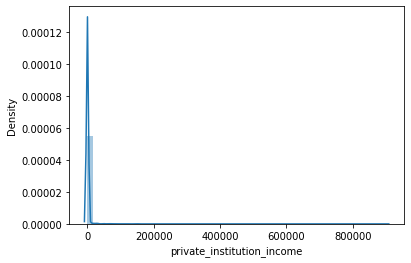

In [ ]:
#visualise ditribution
sns.distplot(dataset['private_institution_income'])

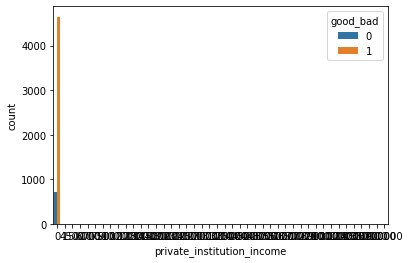

In [ ]:
sns.countplot(x= 'private_institution_income', data=dataset, hue= 'good_bad')

# **3. Remittance_income**

In [ ]:
dataset['remittance_income'].unique()

array([      0,   50000,   11200,   70000,   33000,   13500,    4500,
        300000,    5000,   16300,   18000,  100000,   20000,   25000,
         23000,   19000,   30000,   15000,   11400,    7000,  160000,
        260000,   68100,   24000,   60000,   40000,   90000,   80000,
         75000,    9000,   19500,   35000,   10000,    6000,  200000,
       1000000,   53000,   11250,    1040,    4000,   52000,   10500,
        118000,   41500,   21600,   32000,  127000,   46000])

In [ ]:
dataset['remittance_income'].describe()

count       5447.000000
mean         772.882321
std        15761.282993
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max      1000000.000000
Name: remittance_income, dtype: float64

5373 are zeros

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


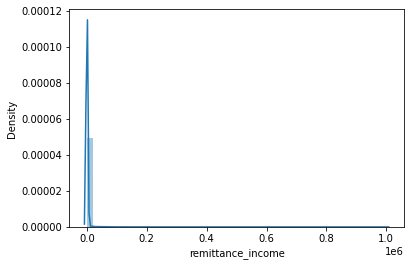

In [ ]:
#visualise ditribution
sns.distplot(dataset['remittance_income'])

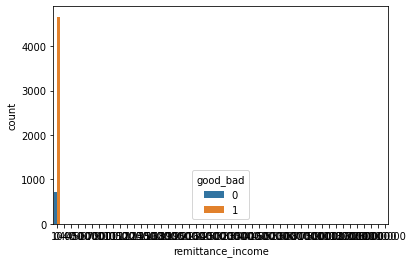

In [ ]:
sns.countplot(x= 'remittance_income', data=dataset, hue= 'good_bad')

# **4. Agricutural_income**

In [ ]:
dataset['agricultural_income'].unique()

array([0])

In [ ]:
dataset['agricultural_income'].describe()

count    5447.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: agricultural_income, dtype: float64

5447 are zeros

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


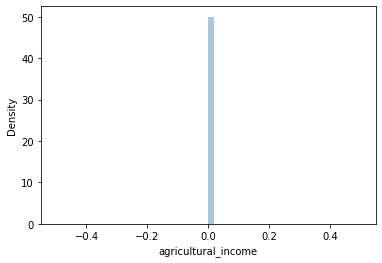

In [ ]:
#visualise ditribution
sns.distplot(dataset['agricultural_income'])

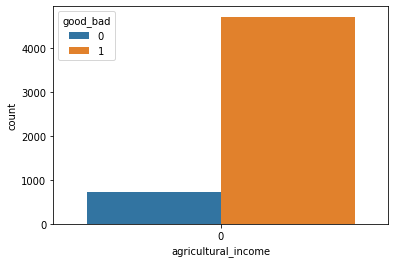

In [ ]:
sns.countplot(x= 'agricultural_income', data=dataset, hue= 'good_bad')

# **5. Service_provision_income**

In [ ]:
dataset['service_provision_income'].unique()

array([     0,   7000,  15000,  30000,   2000,  24000,   5000, 180000,
        21000,  90000, 100000,  36000,   6000,  50000,  10000,  12000,
        60000,  20000,  70000,  40000,  18000,  25000,   9000,   3000,
        11000,  14000,   4000,  80000,  16800,   3500,  13000,  45000,
        19200,   7200, 450000,  67500, 300000, 133500,  32000,   8000])

In [ ]:
dataset['service_provision_income'].describe()

count      5447.000000
mean        752.689554
std        9828.574347
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      450000.000000
Name: service_provision_income, dtype: float64

5348 are zeros

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


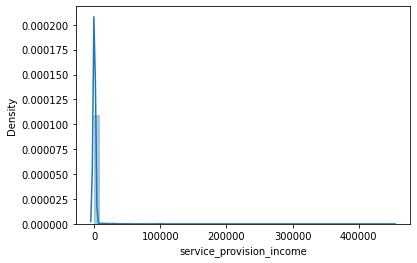

In [ ]:
#visualise ditribution
sns.distplot(dataset['service_provision_income'])

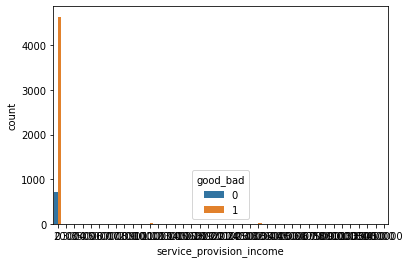

In [ ]:
sns.countplot(x= 'service_provision_income', data=dataset, hue= 'good_bad')

# **6. Commercial_trade_income**

In [ ]:
dataset['commericial_trade_income'].unique()

array([       0,     9000,    50000,    21000,    42000,       40,
         200000,    12500,    52000,    60000,   100000,    10000,
          30000,   170000,    26000,    95000,    15000,    80000,
          20000,    33400,     5250,     9600,   120000,     5000,
          40000,     6600,    73500,    18000,    22000,    25000,
          58900,     5800,     6000,    16000,     4000,     8000,
          70000,   340000,     3000,    27000,    24000,    12000,
          14400,     7000,    48000,     4700,   210500,   500000,
         850500,    14000,    45000,     2000,    56750,    51000,
         360000,   160000,    72000,    36000,    45600,    17000,
          21300,     7200,    32000,    13500,    55000,    35000,
          24800,     1000,   870000,    42500,    40335,    13000,
         150000,     1500,    12660,   110000,   450000, 20000000,
           5400,    11000,   300000,     8050,    46000,    61500,
          87500,   105000,    56000,    39000,    27200,    38

In [ ]:
# check value count for the unique values
pension_df = pd.DataFrame(dataset['commericial_trade_income'].value_counts().reset_index().values, columns=['Categories','Aggregate Sum'])
pension_df['% of Total'] = pension_df['Aggregate Sum'] / len(dataset) * 100
pension_df.head(10)

,Categories,Aggregate Sum,% of Total
0,0,4823,88.544153
1,20000,62,1.138241
2,15000,60,1.101524
3,10000,53,0.973013
4,30000,47,0.862860
5,50000,35,0.642556
6,40000,20,0.367175
7,9000,20,0.367175
8,60000,20,0.367175
9,6000,19,0.348816


In [ ]:
dataset['commericial_trade_income'].describe()

count    5.447000e+03
mean     8.917851e+03
std      2.743317e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+07
Name: commericial_trade_income, dtype: float64

4823 are zeros

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


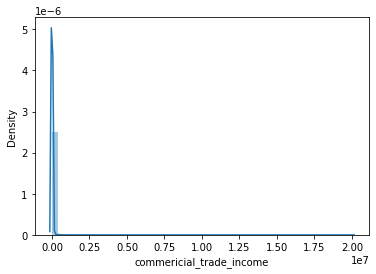

In [ ]:
#visualise ditribution
sns.distplot(dataset['commericial_trade_income'])

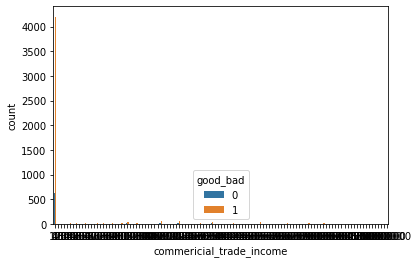

In [ ]:
sns.countplot(x= 'commericial_trade_income', data=dataset, hue= 'good_bad')

# **7. Frequent_monthly_expense**

In [ ]:
dataset['frequent_monthly_expense'].unique()

array(['Food , Other', 'Other', 'Food , Farm inputs',
       'School fees , Food', 'Food', 'Food , Loans , Other',
       'Food , Farm inputs , Rent', 'Farm inputs', 'Food , Loans',
       'Food , Farm inputs , Loans', 'School fees , Food , Loans',
       'School fees', 'School fees , Food , Farm inputs',
       'Food , Farm inputs , Other',
       'School fees , Food , Clothing , Farm inputs',
       'School fees , Food , Rent , Other', 'Rent',
       'Food , Clothing , Farm inputs , Other',
       'School fees , Food , Other', 'School fees , Loans',
       'School fees , Food , Farm inputs , Rent , Loans', 'Food , Rent',
       'Food , Rent , Loans , Other', 'School fees , Other',
       'Rent , Other', 'Farm inputs , Other',
       'School fees , Food , Loans , Other',
       'School fees , Food , Farm inputs , Rent', 'Food , Rent , Other',
       'School fees , Food , Rent', 'School fees , Farm inputs',
       'School fees , Food , Farm inputs , Loans',
       'School fees , Food ,

In [ ]:
dataset['frequent_monthly_expense'].describe()

count      5447
unique       77
top       Other
freq       1466
Name: frequent_monthly_expense, dtype: object

In [ ]:
#visualise ditribution
#sns.distplot(dataset['frequent_monthly_expense'])

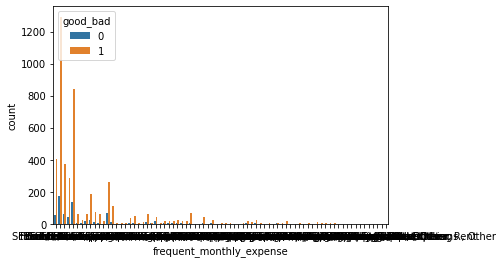

In [ ]:
sns.countplot(x= 'frequent_monthly_expense', data=dataset, hue= 'good_bad')

# **8. Number of loans**

In [ ]:
dataset['number_of_loans'].unique()

array(['0 loans', '1 loan', '2-3 loans', 'More than 4 loans'],
      dtype=object)

In [ ]:
dataset['number_of_loans'].describe()

count        5447
unique          4
top       0 loans
freq         3115
Name: number_of_loans, dtype: object

In [ ]:
dataset['number_of_loans'].value_counts()

0 loans              3115
1 loan               1763
2-3 loans             537
More than 4 loans      32
Name: number_of_loans, dtype: int64

3674 are 0-loans

In [ ]:
#visualise ditribution
#sns.distplot(dataset['number_of_loans'])

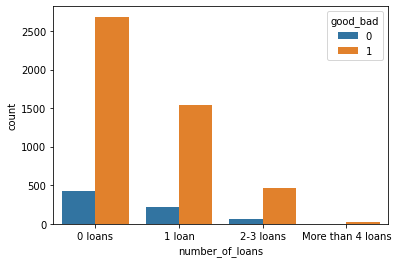

In [ ]:
sns.countplot(x= 'number_of_loans', data=dataset, hue= 'good_bad')

# **9. Number of outstanding loans**

In [ ]:
dataset['number_of_outstanding_loans'].unique()

array(['0 loans', '1 loan', '2-3 loans', 'More than 4 loans'],
      dtype=object)

In [ ]:
dataset['number_of_outstanding_loans'].describe()

count        5447
unique          4
top       0 loans
freq         3674
Name: number_of_outstanding_loans, dtype: object

3674 are 0-loans

In [ ]:
#visualise ditribution
#sns.distplot(dataset['number_of_loans'])

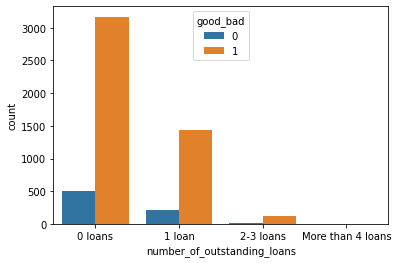

In [ ]:
sns.countplot(x= 'number_of_outstanding_loans', data=dataset, hue= 'good_bad')

# **10. Remaining_payment_months**

In [ ]:
dataset['remaining_payment_months'].unique()

array([      0,       1,      36,      12,       3,      48,      18,
            24,      20,      14,       6,       5,      72,      76,
             2,      11,      25,      10,      31,       7,      53,
            60,      40,       4,      68,      50,      56,      16,
            13,       8,      32,       9,      84,      52,      17,
            30,      15,      29,      21,      22,      80,      54,
            73,      28,      58,     108,      88,      42,   20000,
            66,     336,     240,     100,      49,      35,   15000,
       1500000,     180,      98,      75,      45,      37,   10000,
           120,      -4,      38,      57,     134,   47265,      19,
            26,      70,    2025,      46,  283331,      34,      27,
            -1,      43,  390000,   22000,     144,  100000,   12000,
           168,      39,     200,      23,      33,   40000,   33000,
            44,      96,   24000,      51,    7000,      83,   14500,
         75000, 1800

In [ ]:
df = dataset[['remaining_payment_months', 'total_outstanding_loan_amount']]
df.sample(30)

,remaining_payment_months,total_outstanding_loan_amount
1291,0,0
2979,0,0
236,0,0
5370,0,0
1371,0,0
4220,0,0
820,0,0
4863,0,0
2593,0,0
618,0,0


In [ ]:
dataset['remaining_payment_months'].value_counts()

0        3766
24        187
1         164
12        141
36        134
         ... 
336         1
33          1
33000       1
44          1
31000       1
Name: remaining_payment_months, Length: 114, dtype: int64

In [ ]:
dataset['remaining_payment_months'].describe()

count    5.447000e+03
mean     2.270369e+03
std      7.246766e+04
min     -4.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      4.260000e+06
Name: remaining_payment_months, dtype: float64

3766 are 0

In [ ]:
#visualise ditribution
#sns.distplot(dataset['number_of_loans'])

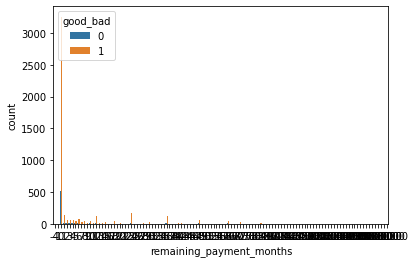

In [ ]:
sns.countplot(x= 'remaining_payment_months', data=dataset, hue= 'good_bad')

In [ ]:
dataset['sum_otherincome'].unique()

array([       0,     7000,    15000,     9000,    50000,    31000,
          21000,    35000,   150000,    42000,       40,   200000,
          30000,    25000,    12500,    11200,    52000,    60000,
          70000,   100000,    33000,    10000,    82000,   170000,
          26000,    95000,    20000,    80000,    13500,    35400,
           5250,    33600,     4500,   120000,     5000,    40000,
           6600,   110000,    28675,    73500,   180000,   300000,
          18000,    22000,    16300,    58900,     5800,    76000,
           6000,    90000,    16000,     4000,    11000,    36000,
           8000,    12000,    84000,    66000,   340000,     3000,
          46000,    27000,    24000,    14400,    23000,    19000,
          37000,     2000,    88000,   108000,    17000,    39000,
          48000,    11400,    94000,     4700,   210500,   500000,
         160000,   850500,    14000,    45000,   260000,    56750,
          68100,    51000,   360000,    72000,    45600,    21

In [ ]:
dataset['sum_otherincome'].describe()

count    5.447000e+03
mean     1.348484e+04
std      2.761760e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+07
Name: sum_otherincome, dtype: float64

4441 are 0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


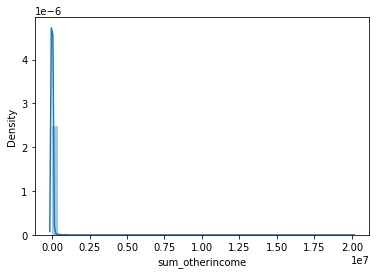

In [ ]:
#visualise ditribution
sns.distplot(dataset['sum_otherincome'])

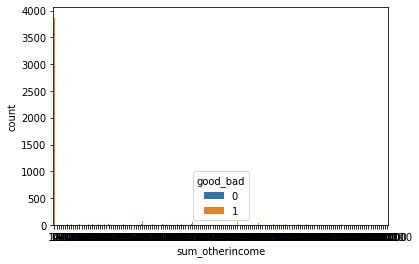

In [ ]:
sns.countplot(x= 'sum_otherincome', data=dataset, hue= 'good_bad')

In [ ]:
variable = "sum_otherincome"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='numerical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto', name='sum_otherincome',
               outlier_detector=None, outlier_params=None,
               prebinning_method='cart', solver='cp', special_codes=None,
               split_digits=None, time_limit=100, user_splits=None,
               user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

array([ 6500., 20500.])

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6500.00)",883,0.810092,763,120,0.135900,0.052645,0.002203,0.000275
1,"[6500.00, 20500.00)",97,0.088991,74,23,0.237113,-0.628551,0.043523,0.005352
2,"[20500.00, inf)",110,0.100917,98,12,0.109091,0.302939,0.008299,0.001033
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.054024,0.006661


# **Income_sum**

In [ ]:
variable = "income_sum"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='numerical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto', name='income_sum',
               outlier_detector=None, outlier_params=None,
               prebinning_method='cart', solver='cp', special_codes=None,
               split_digits=None, time_limit=100, user_splits=None,
               user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

array([ 6500., 20500.])

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6500.00)",883,0.810092,763,120,0.135900,0.052645,0.002203,0.000275
1,"[6500.00, 20500.00)",100,0.091743,77,23,0.230000,-0.58881,0.038882,0.004791
2,"[20500.00, inf)",107,0.098165,95,12,0.112150,0.271849,0.006575,0.000819
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.047659,0.005886


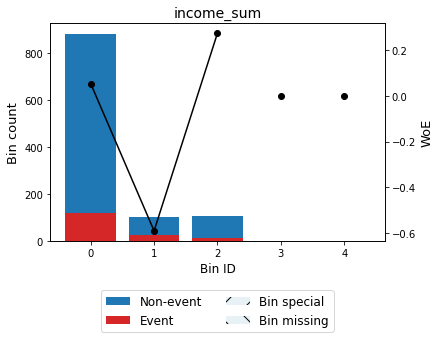

In [ ]:
binning_table.plot(metric="woe")

# **Crops Grown**

In [ ]:
dataset["crops_grown"].value_counts()

3 type of crops               1534
2 type of crops               1213
More than 4 types of crops    1157
4 type of crops                722
1 type of crop                 482
0 type of crops                339
Name: crops_grown, dtype: int64

In [ ]:
variable = "crops_grown"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='categorical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto', name='crops_grown',
               outlier_detector=None, outlier_params=None,
               prebinning_method='cart', solver='cp', special_codes=None,
               split_digits=None, time_limit=100, user_splits=None,
               user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

[array(['1 type of crop'], dtype=object),
 array(['0 type of crops'], dtype=object),
 array(['4 type of crops'], dtype=object),
 array(['2 type of crops'], dtype=object),
 array(['More than 4 types of crops'], dtype=object),
 array(['3 type of crops'], dtype=object)]

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1 type of crop],102,0.093578,96,6,0.058824,0.975467,0.062395,0.007504
1,[0 type of crops],68,0.062385,62,6,0.088235,0.538254,0.014856,0.001835
2,[4 type of crops],146,0.133945,125,21,0.143836,-0.01333,0.000024,0.000003
3,[2 type of crops],252,0.231193,213,39,0.154762,-0.099391,0.002366,0.000296
4,[More than 4 types of crops],236,0.216514,199,37,0.156780,-0.114735,0.002969,0.000371
5,[3 type of crops],286,0.262385,240,46,0.160839,-0.145124,0.005818,0.000727
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.088428,0.010735


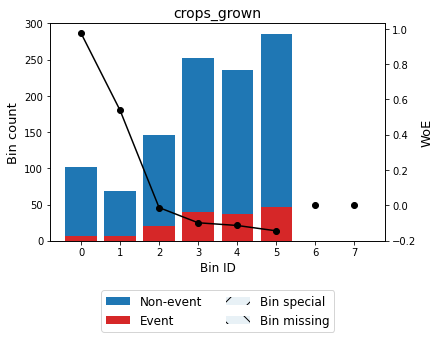

In [ ]:
binning_table.plot(metric="woe")

# **Number_of_businesses_before**

In [ ]:
dataset["number_of_businesses_before"].value_counts()

1 business                2629
0 businesses              2389
2 businesses               360
3-5 businesses              44
More than 5 businesses      25
Name: number_of_businesses_before, dtype: int64

In [ ]:
variable = "number_of_businesses_before"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='categorical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto',
               name='number_of_businesses_before', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=100,
               user_splits=None, user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

[array(['3-5 businesses', 'More than 5 businesses', '2 businesses'],
       dtype=object),
 array(['1 business'], dtype=object),
 array(['0 businesses'], dtype=object)]

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[3-5 businesses, More than 5 businesses, 2 bus...",73,0.066972,67,6,0.082192,0.615812,0.020290,0.002497
1,[1 business],532,0.488073,455,77,0.144737,-0.020629,0.000209,0.000026
2,[0 businesses],485,0.444954,413,72,0.148454,-0.05034,0.001148,0.000143
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.021647,0.002667


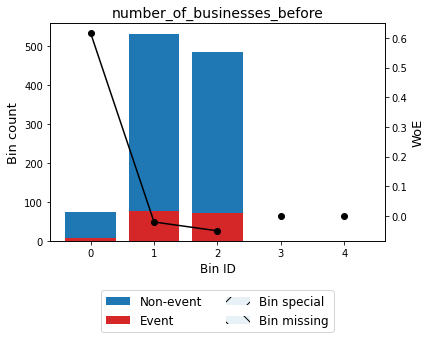

In [ ]:
binning_table.plot(metric="woe")

# **Family_descision_maker**

In [ ]:
dataset["family_descision_maker"].value_counts()

Husband                      3054
Everyone in the household    1822
Wife                          514
Child (son/daughter)           57
Name: family_descision_maker, dtype: int64

In [ ]:
variable = "family_descision_maker"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='categorical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto',
               name='family_descision_maker', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=100,
               user_splits=None, user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

[array(['Wife'], dtype=object),
 array(['Child (son/daughter)', 'Husband'], dtype=object),
 array(['Everyone in the household'], dtype=object)]

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Wife],106,0.097248,94,12,0.113208,0.261267,0.006039,0.000753
1,"[Child (son/daughter), Husband]",633,0.580734,542,91,0.143760,-0.012715,0.000094,0.000012
2,[Everyone in the household],351,0.322018,299,52,0.148148,-0.047922,0.000752,0.000094
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.006886,0.000859


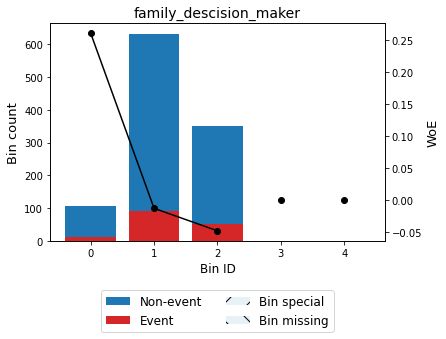

In [ ]:
binning_table.plot(metric="woe")

# **Netincome1_business**

In [ ]:
dataset["netincome1_business"].value_counts()

0.00     2577
50.00     319
60.00     164
66.67     160
40.00     130
         ... 
64.81       1
64.91       1
57.08       1
95.38       1
75.33       1
Name: netincome1_business, Length: 784, dtype: int64

In [ ]:
variable = "netincome1_business"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='numerical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto',
               name='netincome1_business', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=100,
               user_splits=None, user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

array([15.625     , 33.66500092, 42.68000031, 71.27000046])

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 15.62)",608,0.557798,517,91,0.149671,-0.059938,0.002047,0.000256
1,"[15.62, 33.67)",73,0.066972,65,8,0.109589,0.297824,0.005333,0.000664
2,"[33.67, 42.68)",59,0.054128,57,2,0.033898,1.552783,0.074626,0.008491
3,"[42.68, 71.27)",235,0.215596,202,33,0.140426,0.014639,0.000046,0.000006
4,"[71.27, inf)",115,0.105505,94,21,0.182609,-0.298349,0.010427,0.001299
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.092479,0.010716


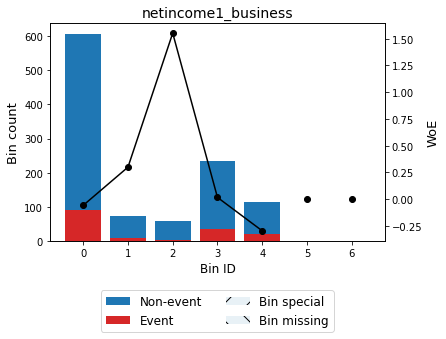

In [ ]:
binning_table.plot(metric="woe")

# **Netincome2_business**

In [ ]:
dataset["netincome2_business"].value_counts()

 0.00      2226
 50.00      311
 60.00      170
 66.67      166
 40.00      134
           ... 
-48.44        1
-760.00       1
 26.09        1
-298.89       1
 86.96        1
Name: netincome2_business, Length: 970, dtype: int64

In [ ]:
variable = "netincome2_business"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='numerical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto',
               name='netincome2_business', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=100,
               user_splits=None, user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

array([-32.40500069,  15.28999996,  33.66500092,  48.64500046,
        74.04999924,  81.88999939])

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -32.41)",55,0.050459,43,12,0.218182,-0.520828,0.016370,0.002023
1,"[-32.41, 15.29)",470,0.431193,405,65,0.138298,0.032378,0.000447,0.000056
2,"[15.29, 33.67)",76,0.069725,68,8,0.105263,0.342945,0.007241,0.000901
3,"[33.67, 48.65)",94,0.086239,87,7,0.074468,0.722877,0.034616,0.004235
4,"[48.65, 74.05)",254,0.233028,217,37,0.145669,-0.028142,0.000186,0.000023
5,"[74.05, 81.89)",69,0.063303,57,12,0.173913,-0.238977,0.003933,0.000490
6,"[81.89, inf)",72,0.066055,58,14,0.194444,-0.375736,0.010630,0.001321
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.073423,0.009050


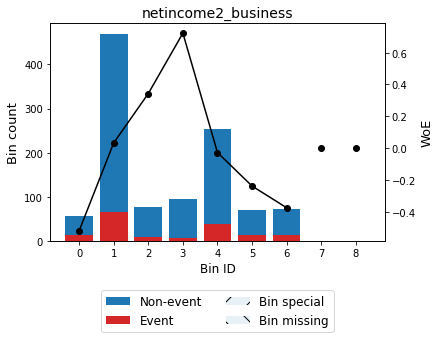

In [ ]:
binning_table.plot(metric="woe")

# **Optbinning**

## **Duration with same employer**

In [ ]:
dataset["duration_with_same_employer"].value_counts()

0-1 year             3588
More than 5 years    1458
2-5 years             297
1-2 years             104
Name: duration_with_same_employer, dtype: int64

In [ ]:
variable = "duration_with_same_employer"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='categorical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto',
               name='duration_with_same_employer', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=100,
               user_splits=None, user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

[array(['1-2 years', '2-5 years'], dtype=object),
 array(['More than 5 years'], dtype=object),
 array(['0-1 year'], dtype=object)]

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[1-2 years, 2-5 years]",99,0.090826,89,10,0.101010,0.38893,0.011929,0.001482
1,[More than 5 years],270,0.247706,242,28,0.103704,0.359612,0.028114,0.003495
2,[0-1 year],721,0.661468,604,117,0.162275,-0.155721,0.016950,0.002117
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.056993,0.007094


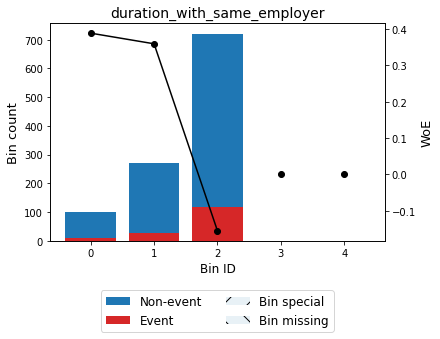

In [ ]:
binning_table.plot(metric="woe")

## **No of jobs before**

In [ ]:
dataset["number_of_jobs_before"].value_counts()

0-1 jobs            5159
2-3 jobs             249
More than 5 jobs      32
4-5 jobs               7
Name: number_of_jobs_before, dtype: int64

In [ ]:
variable = "number_of_jobs_before"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='categorical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto',
               name='number_of_jobs_before', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=100,
               user_splits=None, user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

[array(['4-5 jobs', '2-3 jobs'], dtype=object),
 array(['0-1 jobs', 'More than 5 jobs'], dtype=object)]

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[4-5 jobs, 2-3 jobs]",60,0.055046,52,8,0.133333,0.074681,0.000299,0.000037
1,"[0-1 jobs, More than 5 jobs]",1030,0.944954,883,147,0.142718,-0.004229,0.000017,0.000002
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.000316,0.000039


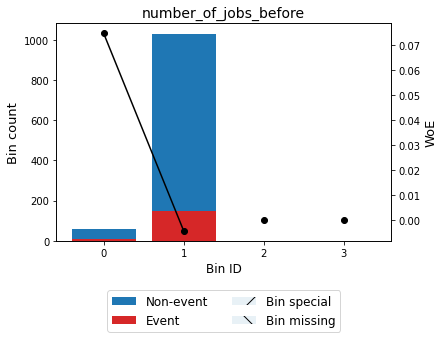

In [ ]:
binning_table.plot(metric="woe")

## **Tank capacity**

In [ ]:
dataset['tank_capacity'].value_counts()

0        2584
5000      602
3000      436
10000     340
1000      253
         ... 
14000       1
960         1
10400       1
410         1
2100        1
Name: tank_capacity, Length: 131, dtype: int64

In [ ]:
variable = "tank_capacity"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='numerical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto', name='tank_capacity',
               outlier_detector=None, outlier_params=None,
               prebinning_method='cart', solver='cp', special_codes=None,
               split_digits=None, time_limit=100, user_splits=None,
               user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

array([ 700., 1025., 2600.])

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 700.00)",497,0.455963,410,87,0.175050,-0.246872,0.030313,0.003780
1,"[700.00, 1025.00)",67,0.061468,58,9,0.134328,0.066097,0.000262,0.000033
2,"[1025.00, 2600.00)",107,0.098165,99,8,0.074766,0.718557,0.038996,0.004772
3,"[2600.00, inf)",419,0.384404,368,51,0.121718,0.179136,0.011563,0.001443
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.081134,0.010028


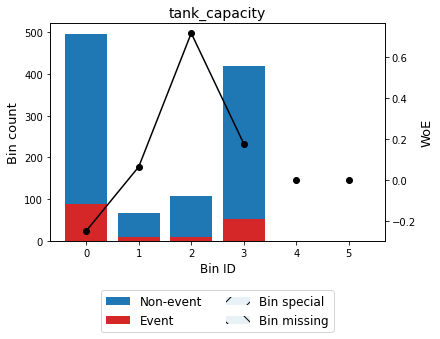

In [ ]:
binning_table.plot(metric="woe")

## **Number of loans**

In [ ]:
variable = "number_of_loans"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='categorical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto', name='number_of_loans',
               outlier_detector=None, outlier_params=None,
               prebinning_method='cart', solver='cp', special_codes=None,
               split_digits=None, time_limit=100, user_splits=None,
               user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

[array(['2-3 loans'], dtype=object),
 array(['1 loan'], dtype=object),
 array(['0 loans', 'More than 4 loans'], dtype=object)]

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[2-3 loans],101,0.092661,91,10,0.099010,0.411153,0.013490,0.001674
1,[1 loan],357,0.327523,306,51,0.142857,-0.005362,0.000009,0.000001
2,"[0 loans, More than 4 loans]",632,0.579817,538,94,0.148734,-0.052558,0.001632,0.000204
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.015131,0.001880


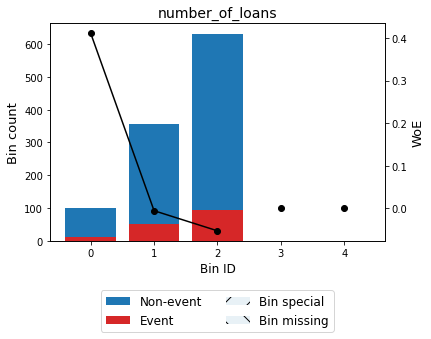

In [ ]:
binning_table.plot(metric="woe")

## **Number of Outstanding loans**

In [ ]:
dataset["number_of_outstanding_loans"].value_counts()

0 loans              3674
1 loan               1640
2-3 loans             129
More than 4 loans       4
Name: number_of_outstanding_loans, dtype: int64

In [ ]:
variable = "number_of_outstanding_loans"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='categorical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto',
               name='number_of_outstanding_loans', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=100,
               user_splits=None, user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

[array(['2-3 loans', '1 loan'], dtype=object),
 array(['0 loans'], dtype=object)]

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[2-3 loans, 1 loan]",359,0.329358,314,45,0.125348,0.145609,0.006626,0.000828
1,[0 loans],731,0.670642,621,110,0.150479,-0.066271,0.003016,0.000377
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.009642,0.001204


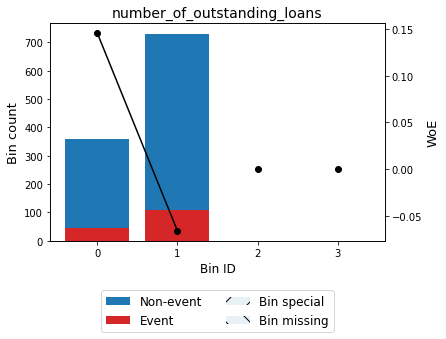

In [ ]:
binning_table.plot(metric="woe")

## **Remaining payment months**

In [ ]:
variable = "remaining_payment_months"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='numerical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto',
               name='remaining_payment_months', outlier_detector=None,
               outlier_params=None, prebinning_method='cart', solver='cp',
               special_codes=None, split_digits=None, time_limit=100,
               user_splits=None, user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

array([ 0.5,  5.5, 12.5])

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",749,0.687156,636,113,0.150868,-0.069311,0.003384,0.000423
1,"[0.50, 5.50)",82,0.075229,67,15,0.182927,-0.300479,0.007547,0.000940
2,"[5.50, 12.50)",82,0.075229,73,9,0.109756,0.296113,0.005925,0.000738
3,"[12.50, inf)",177,0.162385,159,18,0.101695,0.381411,0.020567,0.002555
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.037423,0.004656


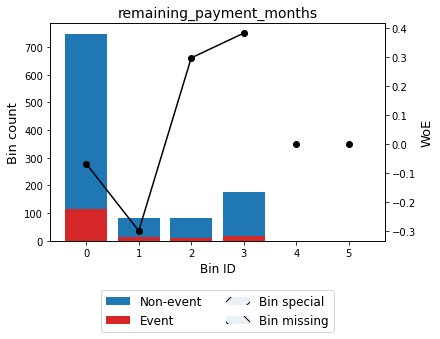

In [ ]:
binning_table.plot(metric="woe")

## **Income_sum**

In [ ]:
variable = "income_sum"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='numerical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto', name='income_sum',
               outlier_detector=None, outlier_params=None,
               prebinning_method='cart', solver='cp', special_codes=None,
               split_digits=None, time_limit=100, user_splits=None,
               user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

array([ 6500., 20500.])

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6500.00)",883,0.810092,763,120,0.135900,0.052645,0.002203,0.000275
1,"[6500.00, 20500.00)",100,0.091743,77,23,0.230000,-0.58881,0.038882,0.004791
2,"[20500.00, inf)",107,0.098165,95,12,0.112150,0.271849,0.006575,0.000819
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.047659,0.005886


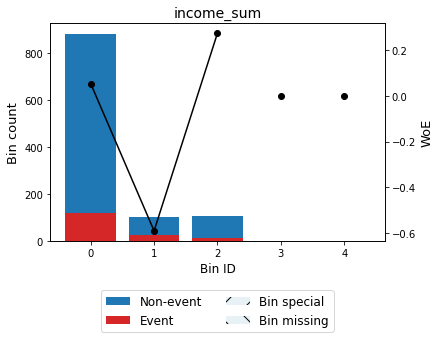

In [ ]:
binning_table.plot(metric="woe")

## **Crops Grown**

In [ ]:
dataset["crops_grown"].value_counts()

3 type of crops               1534
2 type of crops               1213
More than 4 types of crops    1157
4 type of crops                722
1 type of crop                 482
0 type of crops                339
Name: crops_grown, dtype: int64

In [ ]:
variable = "crops_grown"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp")

In [ ]:
optb.fit(x, y)

OptimalBinning(cat_cutoff=None, class_weight=None, divergence='iv',
               dtype='categorical', gamma=0, max_bin_n_event=None,
               max_bin_n_nonevent=None, max_bin_size=None, max_n_bins=None,
               max_n_prebins=20, max_pvalue=None,
               max_pvalue_policy='consecutive', min_bin_n_event=None,
               min_bin_n_nonevent=None, min_bin_size=None,
               min_event_rate_diff=0, min_n_bins=None, min_prebin_size=0.05,
               mip_solver='bop', monotonic_trend='auto', name='crops_grown',
               outlier_detector=None, outlier_params=None,
               prebinning_method='cart', solver='cp', special_codes=None,
               split_digits=None, time_limit=100, user_splits=None,
               user_splits_fixed=None, ...)

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

[array(['1 type of crop'], dtype=object),
 array(['0 type of crops'], dtype=object),
 array(['4 type of crops'], dtype=object),
 array(['2 type of crops'], dtype=object),
 array(['More than 4 types of crops'], dtype=object),
 array(['3 type of crops'], dtype=object)]

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1 type of crop],102,0.093578,96,6,0.058824,0.975467,0.062395,0.007504
1,[0 type of crops],68,0.062385,62,6,0.088235,0.538254,0.014856,0.001835
2,[4 type of crops],146,0.133945,125,21,0.143836,-0.01333,0.000024,0.000003
3,[2 type of crops],252,0.231193,213,39,0.154762,-0.099391,0.002366,0.000296
4,[More than 4 types of crops],236,0.216514,199,37,0.156780,-0.114735,0.002969,0.000371
5,[3 type of crops],286,0.262385,240,46,0.160839,-0.145124,0.005818,0.000727
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1090,1.000000,935,155,0.142202,,0.088428,0.010735


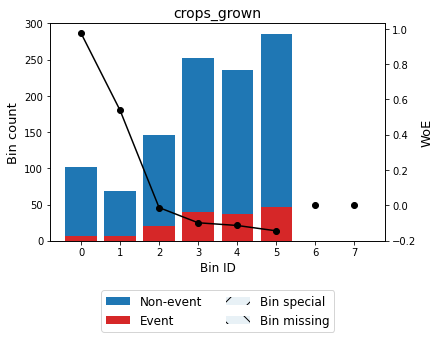

In [ ]:
binning_table.plot(metric="woe")

# **Dummies**

Columns: crops_grown, tank capacity, duration with same employer, remaining_payment_months

## **Crops_grown**

In [ ]:
df_inputs_test['crops_grown'].unique()

array(['2 type of crops', '1 type of crop', 'More than 4 types of crops',
       '3 type of crops', '4 type of crops', '0 type of crops'],
      dtype=object)

In [ ]:
crops_dummies = pd.get_dummies(df_inputs_test['crops_grown'], prefix='crops_grown', prefix_sep=':')
crops_dummies.columns

Index(['crops_grown:0 type of crops', 'crops_grown:1 type of crop',
       'crops_grown:2 type of crops', 'crops_grown:3 type of crops',
       'crops_grown:4 type of crops',
       'crops_grown:More than 4 types of crops'],
      dtype='object')

In [ ]:
# concatenate

df_inputs_test = pd.concat([df_inputs_test, crops_dummies], axis=1)

## **Duration with same employer**

In [ ]:
duration_with_same_employer_dummies = pd.get_dummies(df_inputs_test['duration_with_same_employer'], prefix='duration_with_same_employer', prefix_sep=':')
duration_with_same_employer_dummies.columns


Index(['duration_with_same_employer:0-1 year',
       'duration_with_same_employer:1-2 years',
       'duration_with_same_employer:2-5 years',
       'duration_with_same_employer:More than 5 years'],
      dtype='object')

In [ ]:
# concatenate
df_inputs_test = pd.concat([df_inputs_test, duration_with_same_employer_dummies], axis=1)

In [ ]:
# coarse classing
df_inputs_test['duration_with_same_employer:1-5 years'] = sum([df_inputs_test['duration_with_same_employer:1-2 years'],
                                                df_inputs_test['duration_with_same_employer:2-5 years']])

## **Tank_capacity**

In [ ]:
df_inputs_test['tank_capacity:<= 1100'] =np.where((df_inputs_test['tank_capacity'] <= 1100),1,0)

df_inputs_test['tank_capacity:1100-2450'] = np.where(((df_inputs_test['tank_capacity'] > 1100) &
                                                               (df_inputs_test['tank_capacity'] <= 2450)),1,0)

df_inputs_test['tank_capacity:2450-3400'] = np.where(((df_inputs_test['tank_capacity'] > 2450) &
                                                               (df_inputs_test['tank_capacity'] <= 3400)),1,0)

df_inputs_test['tank_capacity:3400-5400'] = np.where(((df_inputs_test['tank_capacity'] > 3400) &
                                                              (df_inputs_test['tank_capacity'] <= 5400)),1,0)

df_inputs_test['tank_capacity:>5400'] = np.where((df_inputs_test['tank_capacity'] > 5400),1,0)

## **Remaining_payment_months**

In [ ]:
df_inputs_test['remaining_payment_months:<=1.5'] = np.where((df_inputs_test['remaining_payment_months'] <= 1.5),1,0)

df_inputs_test['remaining_payment_months:1.5-7.5'] = np.where(((df_inputs_test['remaining_payment_months'] > 1.5) &
                                                              (df_inputs_test['remaining_payment_months'] <= 7.5)),1,0)

df_inputs_test['remaining_payment_months:7.5-17.50'] = np.where(((df_inputs_test['remaining_payment_months'] > 7.5) &
                                                               (df_inputs_test['remaining_payment_months'] <= 17.50)),1,0)

df_inputs_test['remaining_payment_months:>17.50'] = np.where((df_inputs_test['remaining_payment_months'] > 17.50),1,0)

## **Income_sum**

In [ ]:
df_inputs_test['income_sum:<=1270'] = np.where((df_inputs_test['income_sum'] <= 1270),1,0)

df_inputs_test['income_sum:1270-14200'] = np.where(((df_inputs_test['income_sum'] > 1270) &
                                                              (df_inputs_test['income_sum'] <= 14200)),1,0)

df_inputs_test['income_sum:>14200'] = np.where((df_inputs_test['income_sum'] > 14200),1,0)

## **Number_of_businesses_before**

In [ ]:
number_of_businesses_before_dummies = pd.get_dummies(df_inputs_test['number_of_businesses_before'], prefix='number_of_businesses_before', prefix_sep=':')
number_of_businesses_before_dummies.columns


Index(['number_of_businesses_before:0 businesses',
       'number_of_businesses_before:1 business',
       'number_of_businesses_before:2 businesses',
       'number_of_businesses_before:3-5 businesses',
       'number_of_businesses_before:More than 5 businesses'],
      dtype='object')

In [ ]:
# concatenate
df_inputs_test = pd.concat([df_inputs_test, number_of_businesses_before_dummies], axis=1)

In [ ]:
# coarse classing
df_inputs_test['number_of_businesses_before:2-5 businesses'] = sum([df_inputs_test['number_of_businesses_before:2 businesses'],
                                                df_inputs_test['number_of_businesses_before:3-5 businesses']])

df_inputs_test['number_of_businesses_before:0 & More than 5 businesses'] = sum([df_inputs_test['number_of_businesses_before:0 businesses'],
                                                df_inputs_test['number_of_businesses_before:More than 5 businesses']])

## **Family_descision_maker**

In [ ]:
df_inputs_test['family_descision_maker'].unique()

array(['Child (son/daughter)', 'Husband', 'Wife',
       'Everyone in the household'], dtype=object)

In [ ]:
family_descision_maker_dummies = pd.get_dummies(df_inputs_test['family_descision_maker'], prefix='family_descision_maker', prefix_sep=':')
family_descision_maker_dummies.columns

Index(['family_descision_maker:Child (son/daughter)',
       'family_descision_maker:Everyone in the household',
       'family_descision_maker:Husband', 'family_descision_maker:Wife'],
      dtype='object')

In [ ]:
# concatenate

df_inputs_test = pd.concat([df_inputs_test, family_descision_maker_dummies], axis=1)

In [ ]:
# coarse classing
df_inputs_test['family_descision_maker:Husband_Child(son/daughter)'] = sum([df_inputs_test['family_descision_maker:Husband'],
                                                df_inputs_test['family_descision_maker:Child (son/daughter)']])

## **Netincome1_business**

In [ ]:
df_inputs_test['netincome1_business:<= 15.84'] =np.where((df_inputs_test['netincome1_business'] <15.84),1,0)

df_inputs_test['netincome1_business:15.84-40.85'] = np.where(((df_inputs_test['netincome1_business'] > 15.84) &
                                                               (df_inputs_test['netincome1_business'] <= 40.85)),1,0)

df_inputs_test['netincome1_business:40.85-75.04'] = np.where(((df_inputs_test['netincome1_business'] > 40.85) &
                                                               (df_inputs_test['netincome1_business'] <= 75.04)),1,0)

df_inputs_test['netincome1_business:>75.04'] = np.where((df_inputs_test['netincome1_business'] > 75.04),1,0)

## **Netincome2_business**

In [ ]:
df_inputs_test['netincome2_business:<= 23.90'] =np.where((df_inputs_test['netincome2_business'] <23.90),1,0)

df_inputs_test['netincome2_business:23.90-40.17'] = np.where(((df_inputs_test['netincome2_business'] > 23.90) &
                                                               (df_inputs_test['netincome2_business'] <= 40.17)),1,0)

df_inputs_test['netincome2_business:40.17-81.60'] = np.where(((df_inputs_test['netincome2_business'] > 40.17) &
                                                               (df_inputs_test['netincome2_business'] <= 81.60)),1,0)

df_inputs_test['netincome2_business:>81.60'] = np.where((df_inputs_test['netincome2_business'] > 81.60),1,0)

## **House_hold_number**

In [ ]:
df_inputs_test['house_hold_number'].unique()

array(['04-Jul', 'More than 7', '02-Mar', '1'], dtype=object)

In [ ]:
crops_dummies = pd.get_dummies(df_inputs_test['house_hold_number'], prefix='house_hold_number', prefix_sep=':')
crops_dummies.columns

Index(['house_hold_number:02-Mar', 'house_hold_number:04-Jul',
       'house_hold_number:1', 'house_hold_number:More than 7'],
      dtype='object')

In [ ]:
# concatenate

df_inputs_test = pd.concat([df_inputs_test, crops_dummies], axis=1)

In [ ]:
# coarse classing
df_inputs_test['house_hold_number:1-02-3'] = sum([df_inputs_test['house_hold_number:1'],
                                                df_inputs_test['house_hold_number:02-Mar']])


In [ ]:
df_inputs_test['house_hold_number:4-7'] = df_inputs_test['house_hold_number:04-Jul']


## **Farming_duration**

In [ ]:
farming_duration_dummies = pd.get_dummies(df_inputs_test['farming_duration'], prefix='farming_duration', prefix_sep=':')
farming_duration_dummies.columns


Index(['farming_duration:0-1 year', 'farming_duration:1-2 years',
       'farming_duration:2-5 years', 'farming_duration:More than 5 years'],
      dtype='object')

In [ ]:
# concatenate
df_inputs_test = pd.concat([df_inputs_test, farming_duration_dummies], axis=1)

In [ ]:
# coarse classing
df_inputs_test['farming_duration:more_than_5_years_&_1-2'] = sum([df_inputs_test['farming_duration:More than 5 years'],
                                                df_inputs_test['farming_duration:1-2 years']])

## **Rent**

In [ ]:
df_inputs_test['rent:<=300'] = np.where((df_inputs_test['rent'] <= 300),1,0)

df_inputs_test['rent:>300'] = np.where((df_inputs_test['rent'] > 300),1,0)

## **Loans**

In [ ]:
df_inputs_test['loans:<=6800'] = np.where((df_inputs_test['loans'] <= 6800),1,0)

df_inputs_test['loans:>6800'] = np.where((df_inputs_test['loans'] > 6800),1,0)

# **Final Cols**

In [ ]:
final_cols = ['crops_grown:0 type of crops', 'crops_grown:1 type of crop', 'crops_grown:2 type of crops','crops_grown:3 type of crops','crops_grown:4 type of crops',
            'crops_grown:More than 4 types of crops','duration_with_same_employer:0-1 year', 'duration_with_same_employer:1-5 years','duration_with_same_employer:More than 5 years',
            'remaining_payment_months:<=1.5','remaining_payment_months:1.5-7.5','remaining_payment_months:7.5-17.50','remaining_payment_months:>17.50','tank_capacity:<= 1100',
            'tank_capacity:1100-2450','tank_capacity:2450-3400','tank_capacity:3400-5400','tank_capacity:>5400',
            'number_of_businesses_before:1 business','number_of_businesses_before:2-5 businesses','number_of_businesses_before:0 & More than 5 businesses',
            'income_sum:<=1270','income_sum:1270-14200','income_sum:>14200','family_descision_maker:Everyone in the household','family_descision_maker:Wife',
            'family_descision_maker:Husband_Child(son/daughter)','netincome1_business:<= 15.84','netincome1_business:15.84-40.85','netincome1_business:40.85-75.04',
            'netincome1_business:>75.04','netincome2_business:<= 23.90','netincome2_business:23.90-40.17','netincome2_business:40.17-81.60','netincome2_business:>81.60',
            'house_hold_number:1-02-3','house_hold_number:4-7','house_hold_number:More than 7','farming_duration:more_than_5_years_&_1-2','farming_duration:0-1 year','farming_duration:2-5 years',
            'rent:<=300','rent:>300' ]

final_inputs_df = df_inputs_test[final_cols]


In [ ]:
final_inputs_df.shape

(1090, 43)

In [ ]:
final_inputs_df.head()

,crops_grown:0 type of crops,crops_grown:1 type of crop,crops_grown:2 type of crops,crops_grown:3 type of crops,crops_grown:4 type of crops,crops_grown:More than 4 types of crops,duration_with_same_employer:0-1 year,duration_with_same_employer:1-5 years,duration_with_same_employer:More than 5 years,remaining_payment_months:<=1.5,remaining_payment_months:1.5-7.5,remaining_payment_months:7.5-17.50,remaining_payment_months:>17.50,tank_capacity:<= 1100,tank_capacity:1100-2450,tank_capacity:2450-3400,tank_capacity:3400-5400,tank_capacity:>5400,number_of_businesses_before:1 business,number_of_businesses_before:2-5 businesses,number_of_businesses_before:0 & More than 5 businesses,income_sum:<=1270,income_sum:1270-14200,income_sum:>14200,family_descision_maker:Everyone in the household,family_descision_maker:Wife,family_descision_maker:Husband_Child(son/daughter),netincome1_business:<= 15.84,netincome1_business:15.84-40.85,netincome1_business:40.85-75.04,netincome1_business:>75.04,netincome2_business:<= 23.90,netincome2_business:23.90-40.17,netincome2_business:40.17-81.60,netincome2_business:>81.60,house_hold_number:1-02-3,house_hold_number:4-7,house_hold_number:More than 7,farming_duration:more_than_5_years_&_1-2,farming_duration:0-1 year,farming_duration:2-5 years,rent:<=300,rent:>300
1862,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
4710,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
3527,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1055,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
4342,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
final_inputs_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090 entries, 1862 to 2990
Data columns (total 43 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   crops_grown:0 type of crops                             1090 non-null   uint8
 1   crops_grown:1 type of crop                              1090 non-null   uint8
 2   crops_grown:2 type of crops                             1090 non-null   uint8
 3   crops_grown:3 type of crops                             1090 non-null   uint8
 4   crops_grown:4 type of crops                             1090 non-null   uint8
 5   crops_grown:More than 4 types of crops                  1090 non-null   uint8
 6   duration_with_same_employer:0-1 year                    1090 non-null   uint8
 7   duration_with_same_employer:1-5 years                   1090 non-null   uint8
 8   duration_with_same_employer:More than 5 years          

In [ ]:
# save

final_inputs_df.to_csv('/content/drive/My Drive/AICE/Precredit/test_inputs.csv',index=False)